In [1]:
!pwd

/media/Data/Projects/sedac-vis/data/emissions


In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from glob import glob

In [3]:
files = glob("reactive/*.txt")
print(len(files))

288


In [4]:
with open(files[0]) as f:
    print(f.read())

 GRIDDED EMISSIONS, 1 X 1 degree
 Format: long, lat, value (long/lat = lower left hand corner of cell)
 
 File created: Fri Jul 14 15:34:19 2000
 Scenario: SRES v1.1 A1AIM
 Year: 1990
 Gas: CH4
 Units: MtCH4                                             
 Grand Total:    309.678800000002     
 Reg tots:    72.9801   47.0804  112.8938   76.7245
 Contact: ssmith@pnl.gov with questions
 - - - - - - - - - - - - - - - - - - - - -
-170, -20,        0.0000926100
-167,  65,        0.0002622894
-166,  68,        0.0000809853
-166,  65,        0.0002622894
-166,  64,        0.0002723513
-166,  61,        0.0003018219
-165,  68,        0.0000809853
-165,  66,        0.0000881111
-165,  65,        0.0002622894
-165,  64,        0.0002723513
-165,  62,        0.0002920509
-165,  61,        0.0003018219
-165,  60,        0.0003114959
-164,  68,        0.0000809853
-164,  67,        0.0000845615
-164,  65,        0.0002622894
-164,  62,        0.0002920509
-164,  61,        0.0003018219
-164,  60,     

In [5]:

a = pd.read_csv(files[0])


In [6]:
a.head()

GRIDDED EMISSIONS  \
 Format: long                                          lat   
 File created: Fri Jul 14 15:34:19 2000                NaN   
 Scenario: SRES v1.1 A1AIM                             NaN   
 Year: 1990                                            NaN   
 Gas: CH4                                              NaN   

                                                                              1 X 1 degree  
 Format: long                             value (long/lat = lower left hand corner of c...  
 File created: Fri Jul 14 15:34:19 2000                                                NaN  
 Scenario: SRES v1.1 A1AIM                                                             NaN  
 Year: 1990                                                                            NaN  
 Gas: CH4                                                                              NaN

In [7]:
a = a[10:]
a.head()

GRIDDED EMISSIONS          1 X 1 degree
-170                -20          0.0000926100
-167                 65          0.0002622894
-166                 68          0.0000809853
-166                 65          0.0002622894
-166                 64          0.0002723513

In [8]:
len(a)

10052

In [9]:
a['long'] = a.index

In [10]:
a = a.reset_index(drop=True)

a.head()

GRIDDED EMISSIONS          1 X 1 degree  long
0                -20          0.0000926100  -170
1                 65          0.0002622894  -167
2                 68          0.0000809853  -166
3                 65          0.0002622894  -166
4                 64          0.0002723513  -166

In [11]:
a.columns = ['lat', 'degree', 'long']
a

lat                degree  long
0       -20          0.0000926100  -170
1        65          0.0002622894  -167
2        68          0.0000809853  -166
3        65          0.0002622894  -166
4        64          0.0002723513  -166
...     ...                   ...   ...
10047   -39          0.0396064730   177
10048    63          0.0231598537   178
10049    62          0.0043140309   178
10050   -18          0.0395528272   178
10051   -19          0.0146118807   178

[10052 rows x 3 columns]

In [12]:
a = pd.DataFrame({"long":a['long'], "lat":a["lat"], "deg":a["degree"]})
a.head()

long   lat                   deg
0  -170   -20          0.0000926100
1  -167    65          0.0002622894
2  -166    68          0.0000809853
3  -166    65          0.0002622894
4  -166    64          0.0002723513

In [13]:
a.tail()

long   lat                   deg
10047   177   -39          0.0396064730
10048   178    63          0.0231598537
10049   178    62          0.0043140309
10050   178   -18          0.0395528272
10051   178   -19          0.0146118807

In [14]:
degs = np.array(a["deg"])
np.unique(degs)

array(['        0.0000000002', '        0.0000000008',
       '        0.0000000021', ..., '        0.9817653295',
       '        1.0023513220', '        1.4752262541'], dtype=object)

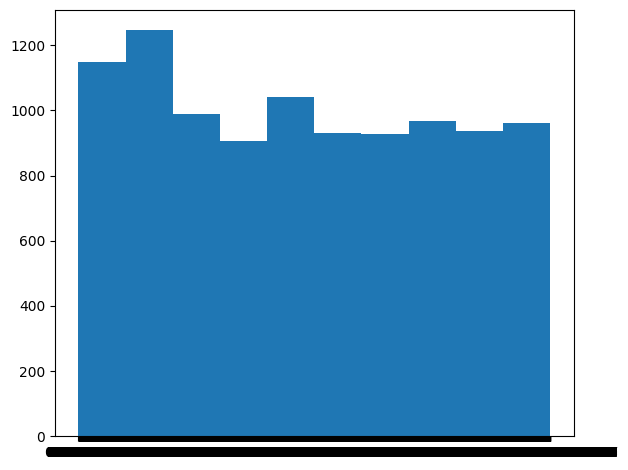

In [15]:
plt.hist(degs)
plt.tight_layout()
plt.show()

In [16]:
type(a["deg"][0])

str

In [29]:
LINE_YEAR = 5
LINE_GAS = 6
LINE_SCE = 4
DIR = "csv/"

def get_newfile_name(lines):
    sce = lines[LINE_SCE].split(":")[-1].split(" ")[-1]
    gas = lines[LINE_GAS].split(":")[-1].split(" ")[-1]
    year = lines[LINE_YEAR].split(":")[-1].split(" ")[-1]

    return f"{gas}_{sce}_{year}.csv"

def parsefile(fname):
    dir = DIR
    with open(fname) as f:
        lines = f.read().splitlines()
        newname = get_newfile_name(lines[:12])
    a = pd.read_csv(fname)
    a = a[10:]
    a['long'] = a.index
    a = a.reset_index(drop=True)  
    a.columns = ['lat', 'degree', 'long']  
    a['long'] = np.array(a['long']).astype(float)
    a['lat'] = np.array(a['lat']).astype(float)
    a['degree'] = np.array(a['degree']).astype(float)
    a = pd.DataFrame({"long":a['long'], "lat":a["lat"], "deg":a["degree"]})
    
    a.to_csv(dir+newname, index=False)

In [30]:
parsefile(files[0])

In [21]:
with open(files[0]) as f:
    x = f.read().splitlines()
    print(get_newfile_name)

CH4_A1AIM_1990.csv


In [ ]:
from tqdm import tqdm

In [35]:
for fil in files:
    try:
        parsefile(fil)
    except:
        print(fil)

reactive/B2MESSAGE2020CH4.txt


In [40]:
fname = "reactive/B2MESSAGE2020CH4.txt"
a = pd.read_csv(fname)
a.head(20)

long  lat    degree
0   -170  -20  0.000123
1   -167   65  0.000256
2   -166   68  0.000079
3   -166   65  0.000256
4   -166   64  0.000266
5   -166   61  0.000295
6   -165   68  0.000079
7   -165   66  0.000086
8   -165   65  0.000256
9   -165   64  0.000266
10  -165   62  0.000285
11  -165   61  0.000295
12  -165   60  0.000304
13  -164   68  0.000079
14  -164   67  0.000083
15  -164   65  0.000256
16  -164   62  0.000285
17  -164   61  0.000295
18  -164   60  0.000304
19  -163   69  0.000076

In [41]:
a['long'] = np.array(a['long']).astype(float)
a['lat'] = np.array(a['lat']).astype(float)
a['degree'] = np.array(a['degree']).astype(float)
a = pd.DataFrame({"long":a['long'], "lat":a["lat"], "deg":a["degree"]})
a.head(30)

long   lat       deg
0  -170.0 -20.0  0.000123
1  -167.0  65.0  0.000256
2  -166.0  68.0  0.000079
3  -166.0  65.0  0.000256
4  -166.0  64.0  0.000266
5  -166.0  61.0  0.000295
6  -165.0  68.0  0.000079
7  -165.0  66.0  0.000086
8  -165.0  65.0  0.000256
9  -165.0  64.0  0.000266
10 -165.0  62.0  0.000285
11 -165.0  61.0  0.000295
12 -165.0  60.0  0.000304
13 -164.0  68.0  0.000079
14 -164.0  67.0  0.000083
15 -164.0  65.0  0.000256
16 -164.0  62.0  0.000285
17 -164.0  61.0  0.000295
18 -164.0  60.0  0.000304
19 -163.0  69.0  0.000076
20 -163.0  68.0  0.000079
21 -163.0  67.0  0.000083
22 -163.0  65.0  0.000256
23 -163.0  61.0  0.000295
24 -163.0  60.0  0.000304
25 -163.0  55.0  0.000806
26 -162.0  69.0  0.000076
27 -162.0  68.0  0.000079
28 -162.0  65.0  0.000256
29 -162.0  60.0  0.000304

In [43]:
newname = "CH4_B2MESSAGE_2020.csv"
a.to_csv(DIR+newname, index=False)